In [225]:
import os
import numpy as np
from imageio import imread
from skimage.transform import resize
from scipy.misc import imsave
from scipy.signal import fftconvolve

images = np.array([])
big_images = np.array([])

for filename in os.listdir(os.getcwd()+"/Data-Images"):
    img = imread("Data-Images/" + filename)
    images = np.append(images, [img])
    print(images.shape)
    
for filename in os.listdir(os.getcwd()+"/Data-Images-Big"):
    img = imread("Data-Images-Big/" + filename)
    new_height = len(img) * 3
    new_length = len(img[0]) * 3
    new_image = np.resize(img, (new_height, new_length))
    print(new_image.shape)
    big_images = np.append(big_images, new_image)
    
#imsave(filename + "_big.jpg", new_image)

first_img = big_images[0]
print (big_images.shape)
#fftconvolve(first_img, big_images[1][::-1, ::-1])
#for i in range(len(1, big_images)):
     #img = big_images[i]
     #print (fftconvolve(first_img, img[::-1, ::-1]))


(331776,)
(663552,)
(995328,)
(1327104,)
(1658880,)
(1990656,)
(2322432,)
(2654208,)
(2985984,)
(3317760,)
(3649536,)
(3981312,)
(4313088,)
(4644864,)
(4976640,)
(5308416,)
(5640192,)
(5971968,)
(6303744,)
(6635520,)
(6967296,)
(7299072,)
(7630848,)
(7962624,)
(8294400,)
(8626176,)
(8957952,)
(9289728,)
(9621504,)
(9953280,)
(10285056,)
(10616832,)
(10948608,)
(11280384,)
(11612160,)
(11943936,)
(12275712,)
(12607488,)
(12939264,)
(13271040,)
(13602816,)


KeyboardInterrupt: 

In [215]:
first_img.shape

()

In [211]:
# import os
# import numpy as np
# from imageio import imread
# from skimage.transform import resize
# from scipy.misc import imsave
# from scipy.signal import fftconvolve#print (first_img)

# big_image1 = imread("Data-Images-Big/im2-0.png_big.jpg")
# big_image2 = imread("Data-Images-Big/im2-1.png_big.jpg")

# def offset(im1, im2):
#    # get rid of the color channels by performing a grayscale transform
#    # the type cast into 'float' is to avoid overflows
#    im1_gray = np.sum(big_image1.astype('float'), axis=2)/3
#    im2_gray = np.sum(big_image2.astype('float'), axis=2)/3

#    # get rid of the averages, otherwise the results are not good
#    im1_gray -= np.mean(im1_gray)
#    im2_gray -= np.mean(im2_gray)

#    # calculate the correlation image; note the flipping of one of the images
#    return fftconvolve(im1_gray, im2_gray[::-1,::-1], mode='same')



test = offset(big_image1, big_image2)
#plt.plot(test)
test.shape
np.argmax(test)

#print(big_image2.shape)
# print(big_image2.size)
# print(im1_gray.size)

373680

# Question 2

In [204]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# we'll need some path manipulations later on
import os

Populating the interactive namespace from numpy and matplotlib


/Users/sarafinanance/anaconda/envs/datascience/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['diff', 'imsave', 'random', 'resize', 'imread', 'datetime', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

In [32]:
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

In [8]:
Audio('data/voice.wav')

In [9]:
from random import random

def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """

    res = np.array([])
    
    for elem in x:
        num = random()
        if fraction > num:
            res = np.append(res, elem)
    return res.astype(numpy.uint8)
        

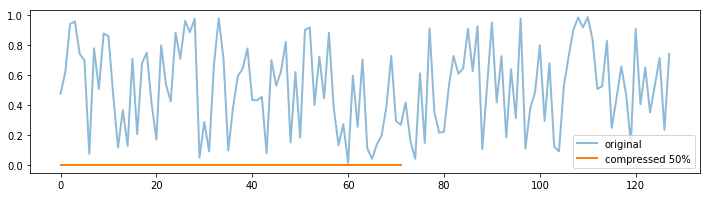

In [10]:
x = np.random.rand(128)

fraction = 0.5  # play changing this in the 0-1 range

xa = compress_signal(x, fraction)

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend();

In [11]:
from scipy.io.wavfile import read, write

def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    
    rate, data = read(fname)
    
    new_audio_compressed = compress_signal(data, fraction)
    
    new_filename = fname + '_comp_' + str(fraction) + '.wav'
    print new_filename
    write(new_filename, rate, new_audio_compressed)
    
    

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int new_filename)? (<ipython-input-11-d3c9ca1fb337>, line 37)

In [68]:
compress_wav('data/voice.wav', 0.1)

data/voice.wav_comp_0.1.wav


# Question 3 A)

29.5783912102


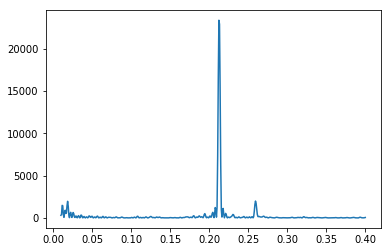

In [72]:
import pandas as pd
from scipy.signal.spectral import lombscargle
%matplotlib inline
from datetime import datetime
import dateutil.parser as parser

merged_data = pd.read_csv("~/Desktop/AST250/hw_1/merged_data.csv")

moon_searches = merged_data["full moon"]
tennis = np.array(merged_data["tennis"]).astype(float)
vball = np.array(merged_data["Volleyball"]).astype(float)
icecream = np.array(merged_data["ice cream"]).astype(float)
time = merged_data["Week"]
moon = np.array(moon_searches).astype(float)

dates = np.zeros([len(time)])
for i in range(len(time)):
    newtime = pd.to_datetime(time[i])
    newtime0 = pd.to_datetime(time[0])
    dates[i]=(newtime - newtime0).days

freq = np.linspace(0.01, 0.40, 500)
lombs = lombscargle(dates, moon, freq)
plt.plot(freq, lombs)

index = argmax(lombs)
period = (1/freq[index])*2*np.pi
print (period)

352.339015683
351.471719645
359.928787662


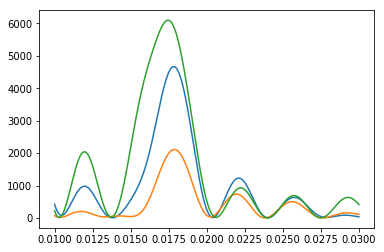

In [82]:
freq_new = np.linspace(0.01, 0.03, 10000)

lombs1 = lombscargle(dates, tennis, freq_new)
lombs2 = lombscargle(dates, vball, freq_new)
lombs3 = lombscargle(dates, icecream, freq_new)

plt.plot(freq_new,lombs1)
plt.plot(freq_new,lombs2)
plt.plot(freq_new,lombs3)

index_ten = argmax(lombs1)
period_ten = (1/freq_new[index_ten])*2*np.pi
print (period_ten)

index_vball = argmax(lombs2)
period_vball = (1/freq_new[index_vball])*2*np.pi
print (period_vball)

index_icecream = argmax(lombs3)
period_icecream = (1/freq_new[index_icecream])*2*np.pi
print (period_icecream)

# Question 4

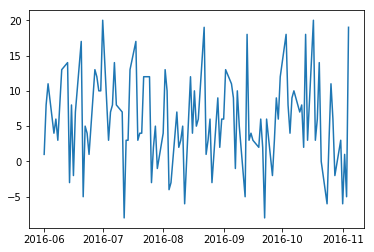

In [116]:
#use numpy.random.binomial to generate a random number list with a 53% probability of voting for Clinton.

days = 200
p = 0.53

#Populate an array of dates starting from June 1 and ending Nov 4, aka Election Day
datelist = pd.bdate_range('2016-06-01 00:00:00', periods=113).tolist()

dates_arr = np.zeros(len(datelist))

#Loop over the array of dates to associate a probability of Hillary winning with each day
for i in range(len(datelist)):
    data = np.random.binomial(days, p)
    #Probability of Hillary winning minus probability of Trump winning to get the overall difference in points 
    diff = ((data/200) - (1- (data/200)))*100
    dates_arr[i] = diff

plt.plot(datelist, dates_arr)

# Question 4 pt. b

In [149]:
'''
Let's create a loop that iterates over all probabilities, 
starting at 100% and moving down, until the point difference drops below 0. At that point 
we'll know what point difference would need to exist in order for a candidate to have a 
100% chance of winning
'''
p2 = 1.0
interviews = 200
end = False

for i in range(100):
    for j in range(200):
        datesnew_arr = np.zeros(len(datelist))
        for k in range(len(datelist)):
            data2 = np.random.binomial(interviews, p2)
            diff2 = ((data2/interviews) - (1- (data2/interviews)))*100
            datesnew_arr[k] = diff2
        if min(datesnew_arr) < 0:
            print('Hillary no longer wins')
            end = True
            print(p)
            break
    p2 -= 0.1
    if p2 < 0.5 or end is True:
        break

Hillary no longer wins
-30.470000000000166


# Question 4 pt. c

In [144]:
'''
Let's create a loop that iterates over all probabilities, 
starting at 100% and moving down, until the point difference drops below 0. At that point 
we'll know what point difference would need to exist in order for a candidate to have a 
100% chance of winning
'''
p3 = 0.515 #This is 51.5% - 3% = 47.5%
interviews_new = 10
end = False

for i in range(10000):
    for j in range(100):
        dates_new_arr = np.zeros(len(datelist))
        for k in range(len(datelist)):
            data3 = np.random.binomial(interviews_new, p3)
            diff3 = ((data3/interviews_new) - (1- (data3/interviews_new)))*100
            dates_new_arr[k] = diff3
        if min(dates_new_arr) > 0:
            print('Trump no longer wins')
            end = True
            print(interviews_new)
            break
    interviews_new += 100
    if end is True:
        break

Trump no longer wins
2810


In [150]:
'''
Let's create a loop that iterates over all probabilities, 
starting at 100% and moving down, until the point difference drops below 0. At that point 
we'll know what point difference would need to exist in order for a candidate to have a 
100% chance of winning
'''
p3 = 0.53 #This is 51.5% - 3% = 47.5%
interviews_new = 10
end = False

for i in range(10000):
    for j in range(100):
        dates_new_arr = np.zeros(len(datelist))
        for k in range(len(datelist)):
            data3 = np.random.binomial(interviews_new, p3)
            diff3 = ((data3/interviews_new) - (1- (data3/interviews_new)))*100
            dates_new_arr[k] = diff3
        if min(dates_new_arr) > 0:
            print('Trump no longer wins')
            end = True
            print(interviews_new)
            break
    interviews_new += 100
    if end is True:
        break

Trump no longer wins
810
